# Neural Nets with Theano

This notebook examplifies the use of Theano to build a neural network. 

## Using a simple data set

To warm up, we will create a simple neural networks to emulate the sin(x) function. This was heavily inspired in [this tutorial](http://iamtrask.github.io/2015/07/12/basic-python-network/).

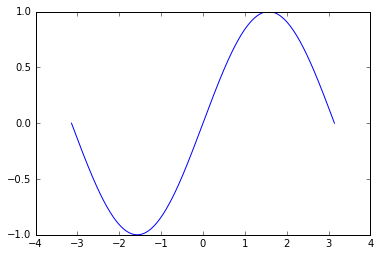

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

%matplotlib inline

x = np.linspace(-1, 1, num=1000)*np.pi
y = np.sin(x)

plt.figure()
plt.plot(x,y)





Although not focues on Neural Network itself, Theanos is a library that facilitates the use of symbolic math. The first step to make this happen is to create our variables. Both our input and ouput are scalars, therefore:

In [4]:
# xT = T.dscalar()
# yT = T.dscalar()

As mentioned before, theanos is not armed with neural net functionality, so we have to implement by ourselves. First, lets implement the layer function.

In [5]:
# def layer(inputs, theta):
#     new_x = T.concatenate([inputs * T.ones(1), T.ones(1)]) # adds a bias unit: inputs + [1]
#     h = nnet.sigmoid(T.dot(theta.T, new_x))
#     return h



Now, we need to specify the gradient descent function for our optimization.

In [6]:
# def grad_desc(cost, theta, alpha):
#     return theta - (alpha * T.grad(cost, wrt=theta))

Next step is to structure our neural network. For now, it will have only one hidden layer with 3 neurons.

In [14]:
# Sigmoid is used for categorical

sigmoid = lambda k: 1/(1+np.exp(-k))
der_sigmoid = lambda k: k*(1-k)

tanh = lambda k: np.tanh(k)
der_tanh = lambda k: (1 - np.tanh(k) ** 2)

def with_bias_unit(layer):
    return np.c_[np.ones((layer.shape[0], 1)), layer]


def nn_cost_function(thetas, X, y, hidden_layer_size, act=sigmoid, der_act=der_sigmoid):
    # Returns the error
    n_examples = X.shape[0]
    n_features = X.shape[1]
    n_output = y.shape[1]
    
    theta1 = thetas[0:(hidden_layer_size*(n_features+1))].reshape((hidden_layer_size,(n_features+1)))
    theta2 = thetas[(hidden_layer_size*(n_features+1)):].reshape((n_output,(hidden_layer_size+1)))
                        
    a1 = np.c_[ones((n_examples,1)),X] ;
    z2 = a1 @ theta1.T;
    a2 = np.c_[ones((n_examples,1)),act(z2)];
    a3 = act(a2 @ theta2.T);
    
    # Deltas
    
    delta3 = a3 - y
    delta2 = (delta3 @ theta2) * der_act(z2);
    
    J = np.mean((y-a3)**2)
    
    theta2_grad = (delta3.T @ a2) / n_examples    
    theta1_grad = (delta2.T @ a1) / n_examples    
    
    grad = np.r_[theta1_grad.ravel(), theta2_grad.ravel()]
    

    return J, grad

def build_nn(X, y, hidden_layer_size, act=sigmoid, der_act=der_sigmoid):
    return lambda t: nn_cost_function(t, X, y, hidden_layer_size, act, der_act)
    
def run_forward(X,thetas, hidden_layer_size, output_size, act=sigmoid):
    n_examples = X.shape[0]
    n_features = X.shape[1]
    
    theta1 = thetas[0:(hidden_layer_size*n_features)].reshape((hidden_layer_size,n_features))
    theta2 = thetas[(hidden_layer_size*n_features):].reshape((n_output,hidden_layer_size))
                        
    a1 = X;
    z2 = a1 @ theta1.T;
    a2 = act(z2);
    return act(a2 @ theta2.T);

 

In [15]:

def test_nn_cost_function():
    import scipy.io

    data = scipy.io.loadmat("ex4weights.mat")
    data = scipy.io.loadmat("ex4data1.mat", mdict=data)
    print(data.keys())
    
    theta1 = data["Theta1"]
    theta2 = data["Theta2"]
    
    thetas = np.r_[data["Theta1"].ravel(), data["Theta2"].ravel()]
    
    n_hidden_layer = theta1.shape[0]
    
    J, cost = nn_cost_function(thetas, data["X"], data["y"], n_hidden_layer, act=sigmoid, der_act=der_sigmoid)
    
    print(cost)
    

test_nn_cost_function()

dict_keys(['Theta1', '__header__', '__globals__', 'X', 'Theta2', '__version__', 'y'])


ValueError: total size of new array must be unchanged

In [35]:

Xsin = (np.random.random((300,1))*2 - 1) * np.pi
ysin = np.sin(Xsin) / 2 + 0.5

Xxor = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])
                
yxor = np.array([[0],
              [1],
              [1],
              [0]])

X = Xxor
y=yxor
n_hidden = 3
n_input = X.shape[1]
n_output = y.shape[1]

init_thetas = np.random.random((n_input * n_hidden + n_hidden * n_output,1))

nn = build_nn(X, y, n_hidden)

res = op.minimize(nn, init_thetas, jac=True, tol=0.001, method = 'BFGS')

print(res.message)
print(res.fun)
# run_forward(X, res.x, 3, 1)


Desired error not necessarily achieved due to precision loss.
0.2497388979069376


The final step is the function that runs the neural net forward, after we have trained it.

array([[0],
       [1],
       [1],
       [0]])

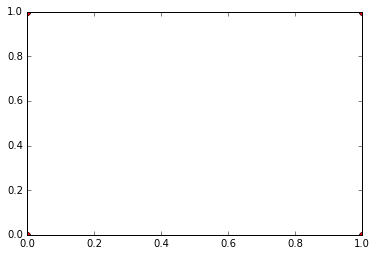

In [32]:
yEst = run_forward(X, res.x, 3, 1);

plt.figure();
# plt.plot(X, yEst, 'g+')
plt.plot(X, y, 'ro')


In [44]:
np.arange(6) @ np.arange(6)

55